In [1]:
from self_discover import graph, self_discover

D:\Surge\self-discover\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


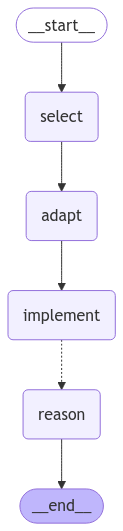

In [2]:
graph

In [3]:
import getpass
import os

if "MISTRAL_API_KEY" not in os.environ:
    os.environ["MISTRAL_API_KEY"] = getpass.getpass("Enter your Mistral API key: ")

In [4]:
from langchain_mistralai import ChatMistralAI
from langchain_core.rate_limiters import InMemoryRateLimiter

model_kwargs = {
    "temperature": 0.2,
    "top_p": 0.9,
    "top_k": 15,
    "max_tokens": 10240
}

rate_limiter = InMemoryRateLimiter(
    requests_per_second=0.9,
    check_every_n_seconds=1,
    max_bucket_size=1,
)

model = ChatMistralAI(
    model="mistral-large-2407",
    rate_limiter=rate_limiter,
    **model_kwargs
)

C:\Users\sachi\AppData\Local\Temp\ipykernel_24452\2015449585.py:11: LangChainBetaWarning: Introduced in 0.2.24. API subject to change.
  rate_limiter = InMemoryRateLimiter(


In [5]:
task_description = [
    r"Suppose that $4^{a}=5$, $5^{b}=6$, $6^{c}=7,$ and $7^{d}=8$. What is $a\cdot b\cdot c\cdot d$?",
    r"Find all values of $x$ that satisfy the equation $x = \!\sqrt{11-2x} + 4$.",
    r"Two positive numbers $p$ and $q$ have the property that their sum is equal to their product. If their difference is $7$, what is $\frac{1}{\frac{1}{p^2}+\frac{1}{q^2}}$? Your answer will be of the form $\frac{a+b\sqrt{c}}{d}$, where $a$ and $b$ don't both share the same common factor with $d$ and $c$ has no square as a factor. Find $a+b+c+d$.",
    r"$a$ and $b$ are real numbers and satisfy $ab^2=\frac{27}{5}$ and $a^2b=135$. Compute $a+5b$.",
    r"The expression $\dfrac{\sqrt{10}}{\sqrt[4]{10}}$ equals 10 raised to what power?"
]

In [6]:
result = self_discover(task_description, model, "The final value of the word problem without any expalainations.")

{'select': {'selected_modules': "4 How can I simplify the problem so that it is easier to solve?\n9 How can I break down this problem into smaller, more manageable parts?\n10 Critical Thinking: This style involves analyzing the problem from different perspectives, questioning assumptions, and evaluating the evidence or information available. It focuses on logical reasoning, evidence-based decision-making, and identifying potential biases or flaws in thinking.\n16 What is the core issue or problem that needs to be addressed?\n20 Are there any relevant data or information that can provide insights into the problem? If yes, what data sources are available, and how can they be analyzed?\n25 Is the problem a technical or practical one that requires a specific expertise or skill set? Or is it more of a conceptual or theoretical problem?\n29 Is the problem an analytical one that requires data analysis, modeling, or optimization techniques?\n38 Let's think step by step.\n39 Let's make a step b

In [11]:
print(result.values.keys())

dict_keys(['task_description', 'answer_formats', 'task_examples', 'selected_modules', 'adapted_modules', 'reasoning_structure', 'reasoning'])


In [13]:
print(result.values["reasoning_structure"])

```json
{
    "Identify the core mathematical issue or problem": {
        "Analyze the problem to determine the core issue": {}
    },
    "Simplify the equation or expression": {
        "Simplify the given equation or expression to make it more solvable": {}
    },
    "Break down the problem into smaller steps": {
        "Break down the mathematical problem into smaller, more manageable steps or components": {}
    },
    "Apply relevant mathematical formulas or theorems": {
        "Identify and apply relevant mathematical formulas, theorems, or data to the problem": {}
    },
    "Determine if the problem is computational or requires specific techniques": {
        "Assess if the problem is primarily computational or requires specific mathematical techniques or concepts": {}
    },
    "Analyze the problem from different mathematical perspectives": {
        "Critically analyze the problem from different mathematical perspectives, question assumptions, and evaluate the given inf

In [15]:
print(result.values["reasoning"][4])

```json
{
    "Identify the core mathematical issue or problem": {
        "Analyze the problem to determine the core issue": "The core issue is to determine the power to which 10 must be raised to equal the expression \\(\\dfrac{\\sqrt{10}}{\\sqrt[4]{10}}\\)."
    },
    "Simplify the equation or expression": {
        "Simplify the given equation or expression to make it more solvable": "Rewrite the expression using exponents: \\(\\dfrac{\\sqrt{10}}{\\sqrt[4]{10}} = \\dfrac{10^{1/2}}{10^{1/4}}\\)."
    },
    "Break down the problem into smaller steps": {
        "Break down the mathematical problem into smaller, more manageable steps or components": "1. Simplify the expression using exponent rules. 2. Determine the resulting exponent."
    },
    "Apply relevant mathematical formulas or theorems": {
        "Identify and apply relevant mathematical formulas, theorems, or data to the problem": "Use the exponent rule for division: \\(\\dfrac{a^m}{a^n} = a^{m-n}\\)."
    },
    "Determ